# Model 1 - Horizontal stratigraphic

This is the most simpel model of horizontally stacked layers. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

# new for this
import importlib
from gempy.assets import kriging

Creating the model by importing the input data and displaying it:

In [98]:
geo_data = gp.create_data([0,1000,0,50,0,1000],resolution=[50,1,50], 
                        path_o = os.pardir+"/data/input_data/jan_models/model1_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model1_surface_points.csv") 

Active grids: ['regular']


In [99]:
#geo_data.get_data()

Setting and ordering the units and series:

In [100]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock2,Strat_Series,1,False,#015482,1
1,rock1,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


In [101]:
#%matplotlib inline
#gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [102]:
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [103]:
sol = gp.compute_model(geo_data)

../..\gempy\core\solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))


Displaying the result in x and y direction:

In [104]:
#%matplotlib inline
#gp.plot.plot_section(geo_data, cell_number=25,direction='x', show_data=True)

In [105]:
#%matplotlib inline
#gp.plot.plot_section(geo_data, cell_number=0,direction='y', show_data=True)

In [205]:
import gempy as gp
importlib.reload(kriging)

<module 'gempy.assets.kriging' from '../..\\gempy\\assets\\kriging.py'>

In [206]:
test_data = np.array([[100,0,500,20],[900,0,500,10],[500,0,550,10]])
test_data2 = np.array([[100,0,500,20],[900,0,500,10],[500,0,550,10],[300,0,400,50]])

In [207]:
kriging_model = kriging.kriging_model(model=sol, domain=[2],data=test_data2)

In [208]:
kriging_model.range_ = 200
kriging_model.moving_neighbourhood  = 'n_closest'
kriging_model.set_kriging_type('SK')
kriging_model.nugget = 0

In [209]:
kriging_model.create_kriged_field()

In [210]:
kriging_model.results_df.values.shape

(500, 5)

In [211]:
x = kriging_model.results_df['X'].values
y = kriging_model.results_df['Z'].values
prop = kriging_model.results_df['est_value'].values
var = kriging_model.results_df['est_variance'].values

In [212]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def plot_contour(x,y,z,resolution = 50,contour_method='linear'):
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z


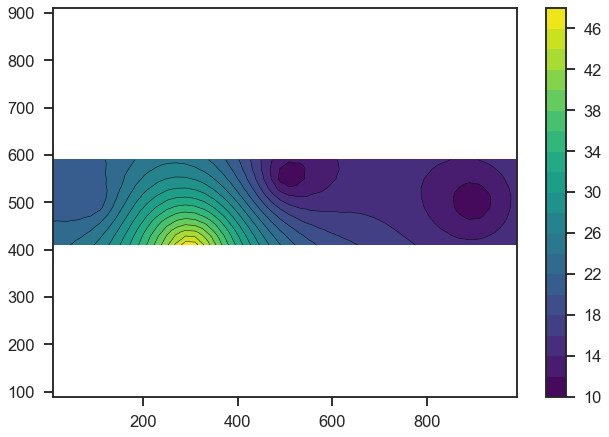

In [213]:
fig1, ax1 = plt.subplots()
ax1.axis('equal')
tcf = ax1.tricontourf(x, y, prop, 20, cmap='viridis')
tcf_lines = ax1.tricontour(x, y, prop, 20, linewidths=0.5, colors='k')
fig1.colorbar(tcf)

plt.show()

In [214]:
#plt.tricontour(x, y, var, 10, linewidths=0.5, colors='k')
#plt.tricontourf(x, y, var, 10, cmap='viridis')
#plt.axis('equal')

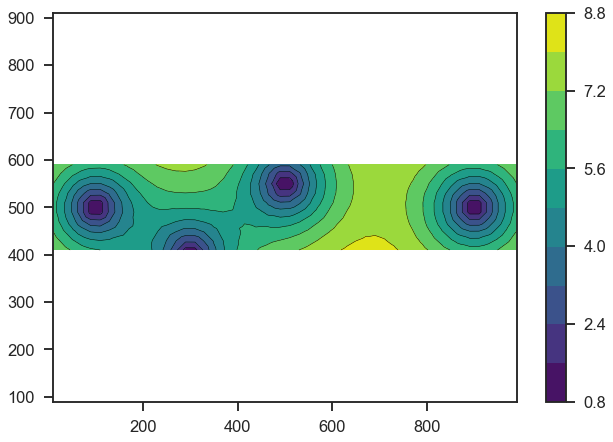

In [215]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
tcf_var = ax2.tricontourf(x, y, var, 10, cmap='viridis')
tcf_lines_var = ax2.tricontour(x, y, var, 10, linewidths=0.5, colors='k')
fig2.colorbar(tcf_var)

plt.show()

In [227]:
kriging_model.create_gaussian_field()

In [228]:
x = kriging_model.results_sim_df['X'].values
y = kriging_model.results_sim_df['Z'].values
prop = kriging_model.results_sim_df['sim_value'].values
var = kriging_model.results_sim_df['est_variance'].values

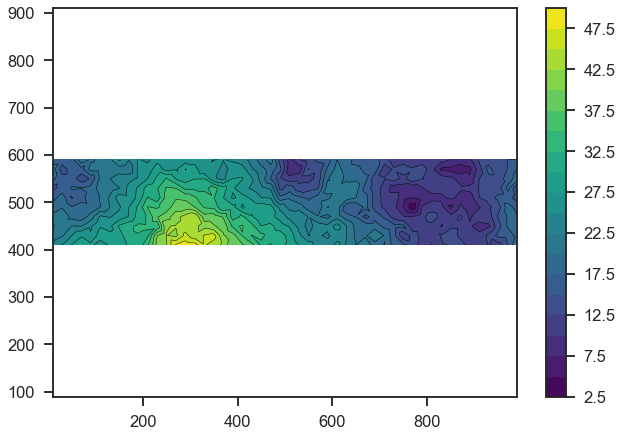

In [229]:
fig3, ax3 = plt.subplots()
ax3.axis('equal')
tcf = ax3.tricontourf(x, y, prop, 20, cmap='viridis')
tcf_lines = ax3.tricontour(x, y, prop, 20, linewidths=0.5, colors='k')
fig3.colorbar(tcf)

plt.show()

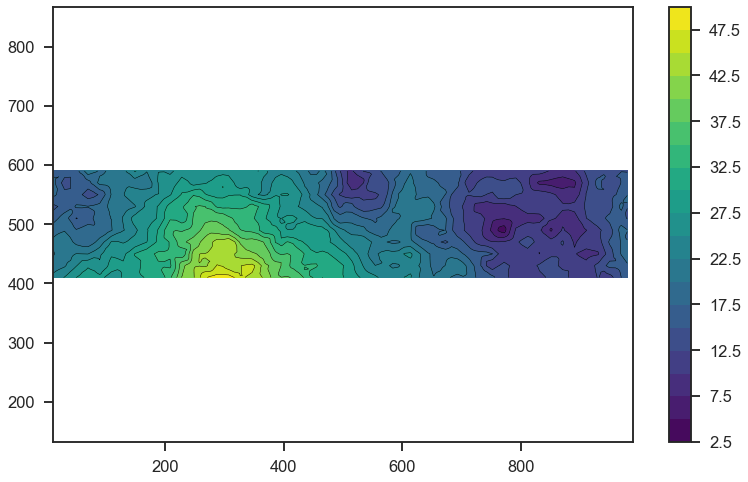

In [230]:
z = prop
X,Y,Z = plot_contour(x,y,z,resolution = 100,contour_method='linear')


fig, ax = plt.subplots(figsize=(13,8))
#ax.scatter(x,y, color="black", linewidth=1, s=2, zorder = 2)
cs = ax.contourf(X,Y,Z, levels=20, cmap='viridis')
cs_line = ax.contour(X,Y,Z, levels=20, colors='black', linewidths=0.5)
#ax.contour(X,Y,Z, levels=15, colors='black')
ax.axis('equal')
fig.colorbar(cs)
plt.show()


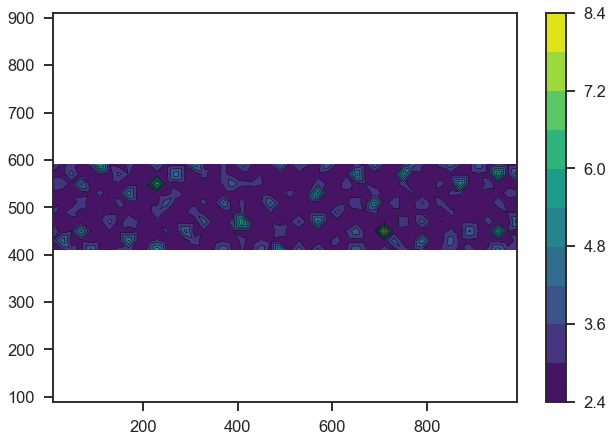

In [231]:
fig4, ax4 = plt.subplots()
ax4.axis('equal')
tcf_var = ax4.tricontourf(x, y, var, 10, cmap='viridis')
tcf_lines_var = ax4.tricontour(x, y, var, 10, linewidths=0.5, colors='k')
fig4.colorbar(tcf_var)

plt.show()

In [232]:
z = prop
from scipy.interpolate import griddata

(10.0, 990.0, 410.0, 590.0)

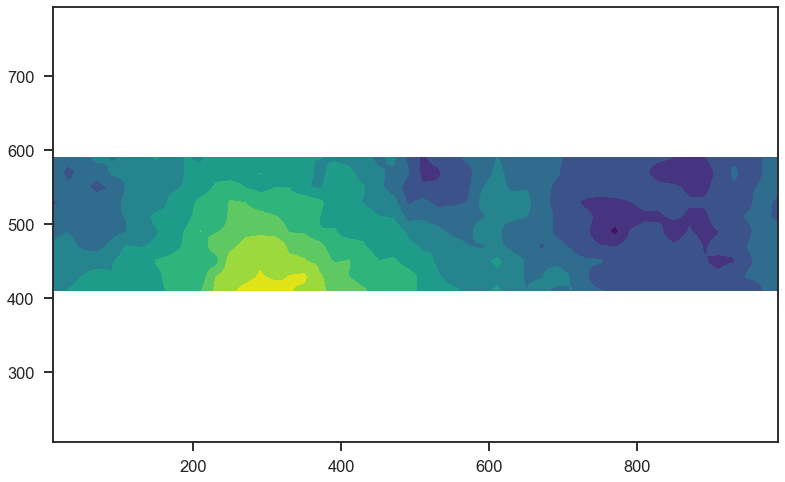

In [233]:
X,Y,Z = plot_contour(x,y,z,resolution = 50,contour_method='linear')

fig, ax = plt.subplots(figsize=(13,8))
#ax.scatter(x,y, color="black", linewidth=1, edgecolor="ivory", s=50)
ax.contourf(X,Y,Z, levels=10, cmap='viridis')
ax.axis('equal')

In [234]:
kriging_model.nugget = 2

In [235]:
d = np.arange(0,1000,1)
test_cov = kriging_model.exponential_covariance_model(d)
test_vario = kriging_model.exponential_variogram_model(d)

In [236]:
print(test_vario[0])
print(test_cov[0])

2.0
8.0


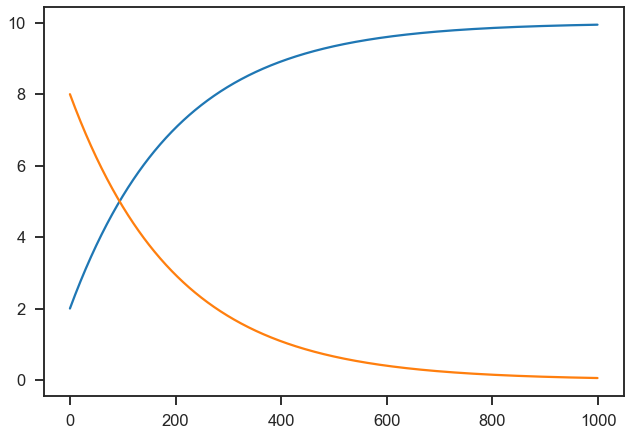

In [237]:
plt.plot(d, test_vario)
plt.plot(d, test_cov)